In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
import time
import timeit
import cv2
from ipywidgets import interact
from IPython.display import display
# Write your imports here

# Linear Algebra Exercise
## Vectors, Matrices, Transformations. Applications of Linear Algebra

### Problem 1. Basis Vectors in 2D Coordinate Space
We know that for an n-dimensional vector space, we need **exactly n** vectors to form a basis. Let's visualize that.

The function you wrote last time for visualizing complex numbers can be extended to visualize any set of vectors. If you haven't already written that, have a look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib). You need to use the `quiver()` function. Pay attention to its parameters so you use it correctly!

Write a function which accepts an array of vectors in the format `[start_x, start_y, end_x, end_y]` and plots them. Optionally, you can add different colors. When you call `quiver()` pass `color = colors` as the last parameter and it will take care of them.

Make sure to leave enough space on the axes. `quiver()` doesn't resize the plot area automatically to fit everything. You can do this manually. A simple `plt.xlim(-10, 10)` and `plt.ylim(-10, 10)` will do the job but you can do much better if you wish :).

In [3]:
def plot_vectors(vectors, colors):
    """
    Plots vectors on the xy-plane. The `vectors` parameter is a Python list.
    Each vector is specified in the format [start_x, start_y, end_x, end_y]
    """
    #start_x = [v[0] for v in vector]
    #start_y = [v[1] for v in vector] #that can get elements from vectors whit Python list comprehation

    vectors_array = np.array(vectors) # make from Python list np.array
    start_x = vectors_array[:, 0] 
    start_y = vectors_array[:, 1]
    end_x = vectors_array[:, 2]
    end_y = vectors_array[:, 3]

    length_x = end_x - start_x
    length_y = end_y - start_y
    
    plt.quiver(start_x, start_y, length_x, length_y, color = colors, scale_units = 'xy', angles = 'xy', scale = 1)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect('equal')

    #plt.axvline(1, linestyle = 'dotted', color = 'gray') # make line on the plot
    #plt.axhline(1, linestyle = 'dotted', color = 'gray')
    #plt.axvline(-2, linestyle = 'dotted', color = 'magenta')
    #plt.axhline(3, linestyle = 'dotted', color = 'magenta')
    
    plt.show()

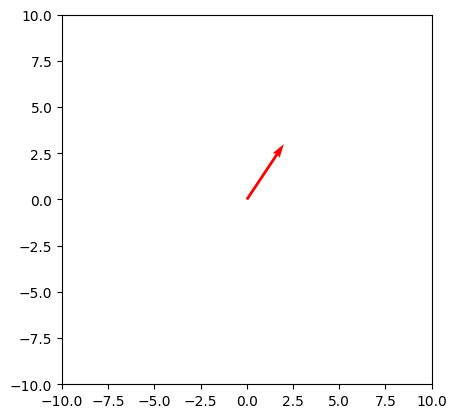

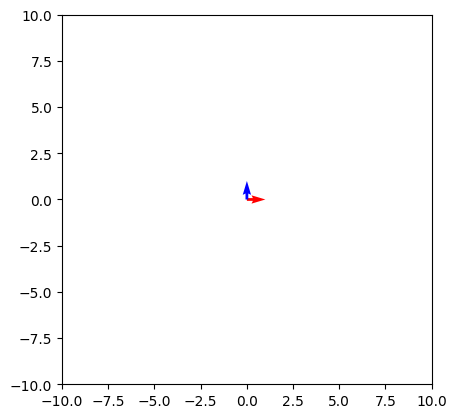

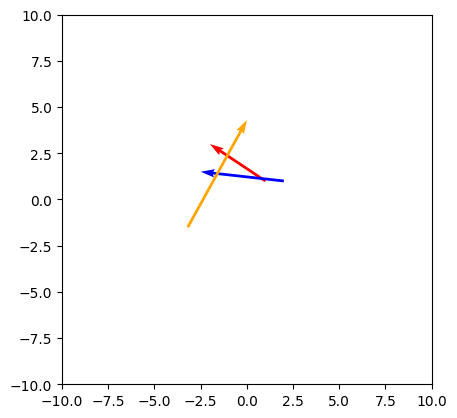

In [4]:
plot_vectors([[0, 0, 2, 3]], ["red"]) # One vector
plot_vectors([[0, 0, 1, 0], [0, 0, 0, 1]], ["red", "blue"]) # Two orthogonal vectors
plot_vectors([[1, 1, -2, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"]) # Three arbitrary vectors

We know that any 2 linearly independent vectors can form a basis in 2D space. This means that every other vector can be represented as their linear combination. It will be easiest to see this in the standard basis of 2D space.

We start by defining the two basis vectors: $e_1, e_2$. Then, we choose an arbitrary vector $v$. We know that it can be expressed as a linear combination $$ v = \lambda_1e_1 + \lambda_2e_2 $$

Finding the unknown coefficients is the same as solving a linear system with as many equations as there are basis vectors (2 in this case). We can do this by using `np.linalg.solve()`.

**Note:** If you want to write `lambda` in Python for some reason, use the variable name `lamda` since `lambda` is a reserved keyword.

In [5]:
def find_linear_combination_coefficients(e1, e2, v):
    """
    Returns the coordinates of the representation of v in the basis {e_1, e_2}.
    That is, the unknown coefficients in the linear combination v = lambda_1 * e_1 + lambda_2 * e_2
    """
    basis_matrix = np.array([e1, e2]).T
    coefficients = np.linalg.solve(basis_matrix, v)
                                  
    #print(basis_matrix)
    return coefficients

Coefficients:  [3.5 8.6]


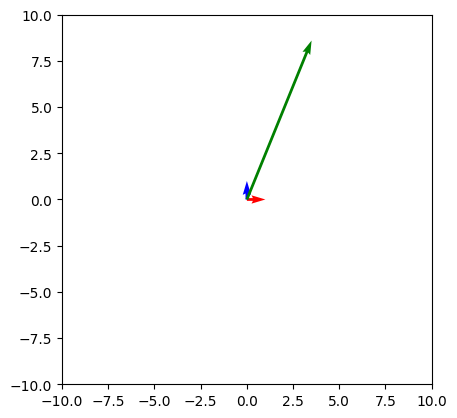

In [6]:
e1, e2 = [[1, 0], [0, 1]]
v = [3.5, 8.6]
# Find the unknown coefficients. Extract the logic in a function.
# It should accept the two basis vectors and the one we need to represent
# and should return the two coefficients
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
# Plot the three vectors
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

The coefficents should be the same as the vector's coordinates. That's because we were extremely careful in choosing a basis.

We know, however, that any pair of linearly independent vectors forms a basis in 2D space. So, let's try this.

Choose two arbitrary vectors (in the code they are `[2, 3]` and `[-5, 1]` but feel free to change them as you wish). Represent $v$ as their linear combination and print the coefficients. After that, plot the resulting vectors to verify visually that the third one is the linear combination of the other two with the coefficients that you saw.

Coefficients:  [2.73529412 0.39411765]


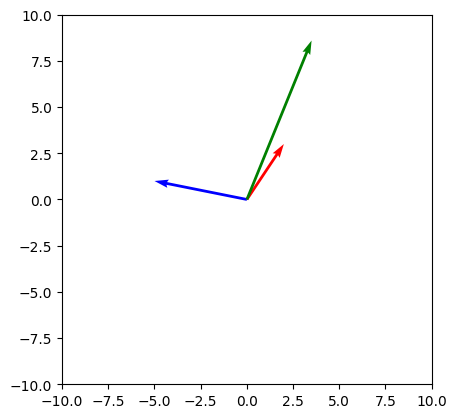

In [7]:
e1, e2 = [[2, 3], [-5, 1]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

What we did was **changing the basis**. We represented **the same original vector $v$** in the new coordinates. We didn't change the geometric object $v$ itself; it still looks the same in the plot. We only changed our viewpoint. This is what change of basis is all about: changing viewpoints.

Let's also see what an "orthogonal" basis is: the basis vectors are orthogonal to each other. You can find online how to compute orthogonal vectors but we don't need that. A definition of orthogonal vectors is: a set of two vectors $a, b$ such that $a.b = 0$. One such set of vectors is `[3, 4], [-4, 3]`.

Represent the same vector $v$ in the orthogonal basis.

Coefficients:  [1.796 0.472]


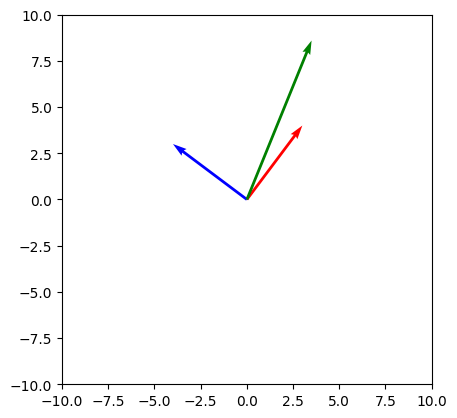

In [8]:
e1, e2 = [[3, 4], [-4, 3]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

In [9]:
np.linalg.norm(e1, np.inf)

4.0

Let's choose a more visually pleasing basis: one whose basis vectors are **collinear** (parallel) to the coordinate axes.

Coefficients:  [1.72  0.875]


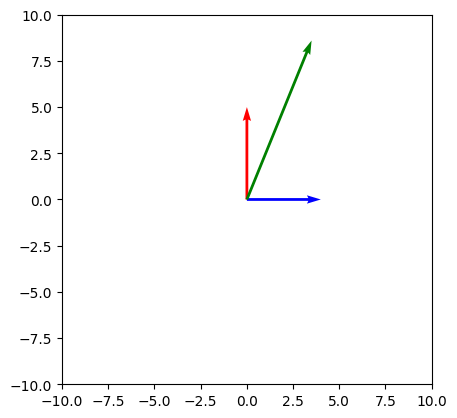

In [10]:
e1, e2 = [[0, 5], [4, 0]]
coefficients = find_linear_combination_coefficients(e1, e2, v)
print("Coefficients: ", str(coefficients))
plot_vectors([[0, 0, i[0], i[1]] for i in [e1, e2, v]], ["red", "blue", "green"])

Now you've seen the coordinates of $v$ in different **bases** (plural form of "basis"). You can see that algebra doesn't really care what the basis vectors are. We simply need *some* point of reference.

You can also see the transition from an arbitrary basis, to an orthogonal basis, to an orthonormal basis, to the standard basis (which is orthonormal **AND** aligned to the xy axes). You can also see that the standard basis gives us the easiest possible representation of a vector. That's why it's so useful.

### Problem 2. Vectorization in `numpy`
As programmers, we're used to writing for-loops to iterate over collections. This is quite OK but in Python makes the code slow (because it's an interpreted, dynamically-typed language). For example, a "standard" way of summing an array would be
```python
x = [2, 3, 8, -2.3, 0, 15]
python_sum = 0
for i in range(len(x)):
    python_sum += x[i]
print(python_sum)
```

However, there are better ways to do this. `numpy` works in C "behind the scenes". This means that:
1. Operations in C are very, very, VERY fast
2. Communication between C and Python is slow

This means we should prepare our code to use `numpy` arrays as much as possible. First of all, this gives us a great computational advantage: the code is very fast. Second, it will look simpler and more beautiful. Compare the previous code with this one:
```python
x = [2, 3, 8, -2.3, 0, 15]
numpy_sum = np.sum(x)
print(numpy_sum)
```

Of course, the for-loop is still done, it's just hidden.

The basic rule is **whenever possible, avoid looping and use vectors and matrices**. Sometimes it's impossible to avoid loops and that's OK.

Let's create a performance test. Create a large array of random numbers. You can use `np.random.random()`. Sum the array using `numpy` and using the for-loop. Compare the times. In some cases, the performance difference will be several hundred times (e.g. length = $1.10^7$, difference $\approx 2000$ times: $\approx 0.01ms$ for the `sum()` and $\approx 2s$ for the loop).

Don't forget to see that the sums are equal. A fast but incorrect algorihm is not an option :).

Next, call the function for different lengths and create two plots showing the time it takes to multiply different-length arrays. **Idea:** You can plot them on two separate y-axes on the same plot. Look at the `twiny()` function. See how much time it takes to perform both operations.

Plot another plot: speedup versus length. Plot the length on the x-axis and the speedup (`np_sum_time / for_loop time`) on the y-axis.

In [11]:
%%timeit
x = [2, 3, 8, -2.3, 0, 15]
python_sum = 0
for i in range(len(x)):
    python_sum += x[i]
#print(python_sum)

536 ns ± 46.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [12]:
%%timeit
x = [2, 3, 8, -2.3, 0, 15]
numpy_sum = np.sum(x)
#print(numpy_sum)

6.94 μs ± 330 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
numpy_sum = np.sum(x)

NameError: name 'x' is not defined

In [ ]:
%%timeit
numpy_sum = np.sum(x)

In [ ]:

# Define the function to time the operations
def time_summing_operations(lengths, repetitions=1000):
    for_loop_times = []
    python_sum_times = []
    numpy_times = []
    speedups_numpy = []
    speedups_builtin = []

    for length in lengths:
        # Generate a random array of the given length
        x = np.random.random(length)
        
        # Measure for-loop time
        def for_loop_sum():
            python_sum = 0
            for i in range(len(x)):
                python_sum += x[i]
            return python_sum

        for_loop_time = timeit.timeit(for_loop_sum, number=repetitions) / repetitions

        # Measure Python's built-in sum time
        python_sum_time = timeit.timeit(lambda: sum(x), number=repetitions) / repetitions

        # Measure numpy sum time
        numpy_time = timeit.timeit(lambda: np.sum(x), number=repetitions) / repetitions

        # Verify the sums are equal
        assert np.isclose(for_loop_sum(), np.sum(x)), "For-loop and numpy sums are not equal!"
        assert np.isclose(for_loop_sum(), sum(x)), "For-loop and built-in sums are not equal!"

        # Append times and speedups
        for_loop_times.append(for_loop_time)
        python_sum_times.append(python_sum_time)
        numpy_times.append(numpy_time)
        speedups_numpy.append(for_loop_time / numpy_time if numpy_time > 0 else 0)
        speedups_builtin.append(for_loop_time / python_sum_time if python_sum_time > 0 else 0)
    
    return for_loop_times, python_sum_times, numpy_times, speedups_numpy, speedups_builtin

# Define specific array lengths
array_lengths = [10, 50, 100, 500, 1000, 2000]

# Perform the timing
for_loop_times, python_sum_times, numpy_times, speedups_numpy, speedups_builtin = time_summing_operations(array_lengths)

# Plot the timing results (time comparison)
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Array Length")
ax1.set_ylabel("Time (seconds)", color="blue")
ax1.plot(array_lengths, for_loop_times, label="For-Loop Time", color="red", marker="o")
ax1.plot(array_lengths, python_sum_times, label="Python Built-in sum() Time", color="orange", marker="o")
ax1.plot(array_lengths, numpy_times, label="Numpy Sum Time", color="green", marker="o")
ax1.legend(loc="upper left")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_title("Time Comparison: For-Loop, Built-in sum(), and Numpy Sum (Linear Scale)")
ax1.grid(True)

# Ensure linear scale
ax1.set_xscale("linear")
ax1.set_yscale("linear")
plt.show()

# Plot the speedup results (separate figure)
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.set_xlabel("Array Length")
ax2.set_ylabel("Speedup (Relative to For-Loop)", color="purple")
ax2.plot(array_lengths, speedups_numpy, label="Speedup (For-Loop / Numpy)", color="purple", marker="o", linestyle="--")
ax2.plot(array_lengths, speedups_builtin, label="Speedup (For-Loop / Built-in sum())", color="brown", marker="o", linestyle="--")
ax2.legend(loc="upper left")
ax2.tick_params(axis="y", labelcolor="purple")
ax2.set_title("Speedup Comparison: Numpy Sum and Built-in sum() vs For-Loop (Linear Scale)")
ax2.grid(True)

# Ensure linear scale
ax2.set_xscale("linear")
ax2.set_yscale("linear")
plt.show()


There's one slight warning to using vectors. If we don't know what we're doing we might get very hard-to-detect bugs.

Let's look at vector multiplication. In algebra we may write:
$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

This is the same as
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=16$$

In vector multiplication, rows and columns don't really matter. However, most of the time we want to use **the matrix convention**: "rows times columns". This means that both products above are undefined. Also, the inner product is
$$ \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}
.
 \begin{bmatrix}
5 \\
-2 \\
3
\end{bmatrix}=16$$

The inverse operation, following our convention, will return a matrix (this is called **outer product**):

$$ \begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}.
 \begin{bmatrix}
5 & -2 & 3
\end{bmatrix}=
\begin{bmatrix}
10 & -4 & 6 \\
15 & -6 & -9 \\
20 & -8 & 12
\end{bmatrix}$$

Let's compare how the default `numpy` behaviour does and how we can impose our convention.

First, let's create the arrays. Next, multiply them. Everything should look fine... until we look at the shapes of `x` and `y` which are `(3,)`. This kind of array is called **rank-1 array**. The matrix convention **DOES NOT** apply to it. One big error is evident when we try to transpose them.

In [ ]:
x = np.array([2, 3, 4])
y = np.array([5, -2, 3])
print("x.y =", str(x.dot(y)))

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x:", x)
print("x transpose:", x.T)

Transposition **DID NOT** turn our row-vector into a column vector! This is correct but **does not follow the matrix convention**.

How do we follow the matrix convention then? Simple, just represent the vectors as matrices (2D arrays).

In [ ]:
x = np.array([[2, 3, 4]]) # Row vector
y = np.array([[5], [-2], [3]]) # Column vector

print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("x.y:\n", x.dot(y)) # Dot product -> still looks like a matrix
print("y.x:\n", y.dot(x)) # Outer product -> matrix

This simple convention can save us a lot of trouble in the future, especially when dealing with more complicated code.

### Problem 3. Visualizing Linear Transformations
Write a code which visualizes a linear transformation. It should show "the old space" and "the new space" imposed on it.

Actually, if you don't want to write the code, I've already provided something for you. The following cell contains the `visualize_transform.py` code from last time. We'll examine it and see how we can use it to show our own transformations.

In [ ]:
def visualize_transformation(matrix, plot_title):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", angles = "xy", scale = 1)
   
    plt.show()

The code is mostly "housekeeping" - making the plot look nicer. It basically consits of several parts:
1. Visualize gridlines
2. Create the transformation from the matrix: `t = Affine2D(matrix)`
3. Visualize transformed gridlines

A quirk with `Affine2D()` is that it uses a 3x3 matrix. What's more, the last row is always `[0, 0, 1]`. This is because the third column corresponds to moving (translation) of the entire coordinate system. As you can imagine, this doesn't leave the origin fixed, therefore **translation is not a linear transformation**. It's an affine transformation, which is exactly what the code does. More info [here](https://stackoverflow.com/questions/10698962/why-do-2d-transformations-need-3x3-matrices).
For our purposes, we defined the 2D transformation matrix as:
$$ T=\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} $$
which we'll pass to the function as
$$ T=\begin{bmatrix}
a & b & 0 \\
c & d & 0 \\
0 & 0 & 1
\end{bmatrix} $$

**Note:** If you want to visualize translations, feel free to do so.

Let's see what various transformations look like.

In [ ]:
# Identity
matrix = [
    [1, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Identity\ transformation}$")

# Scaling
matrix = [
    [2, 0],
    [0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Scaling}$")

# Shear
matrix = [
    [1, 2],
    [-1, 1]
]

visualize_transformation(matrix, r"$\mathrm{Shear}$")

# Rotation
matrix = [
    [np.cos(np.radians(30)), -np.sin(np.radians(30))],
    [np.sin(np.radians(30)), np.cos(np.radians(30))]
]

visualize_transformation(matrix, r"$\mathrm{30^{\circ}\ rotation}$")

# Projection (linearly dependent rows)
matrix = [
    [1, 2],
    [2, 4]
]

visualize_transformation(matrix, r"$\mathrm{Projection\ (linearly\ dependent\ rows)}$")

Feel free to experiment with other matrices and to see what transformation they will result in. Also feel free to write better visualization code.

In [ ]:
matrix = [
   [1, 2],
   [-1, 1]
]
visualize_transformation(matrix, r"$\mathrm{30^{\circ}\ rotation}$")

### Problem 4. Images as Matrices. Image arithmetic
One direct use of matrices and transformations is images. An image is a 2D array (i.e. matrix) of pixels. If it's grayscale, each pixel will be an integer from 0 to 255:
$$ I=\begin{bmatrix}
20 & 45 & 83 & \dots \\
38 & 182 & 200 & \dots \\
\dots & \dots & \dots & \dots \\
\end{bmatrix} $$

In an RGB image, each pixel contains three values, corresponding to $R$, $G$ and $B$.

A bigger number means more brightness in the corresponding channel, for example `[255, 0, 0]` is a completely red pixel. `[0, 0, 0]` is a black pixel, and `[255, 255, 255]` is a white pixel.

Because we treat images as matrices, we can peform arithmetic operations on them.

To show an image, you can use `plt.imshow()`.

#### Opening an image from the Internet
This one proves not to be easy. However, there's a library for working with images called `scikit-image` which solves most of our problems. Even better, it returns a `numpy` array, which is perfect for us.

In [ ]:
def read_image(url):
    img = skimage.io.imread(url)
    return img

In [ ]:
cat_image_url = "https://d17fnq9dkz9hgj.cloudfront.net/uploads/2012/11/140272627-grooming-needs-senior-cat-632x475.jpg"
cat_image = read_image(cat_image_url)

In [ ]:
np.shape(cat_image)
cat_imag_np = np.array(cat_image)
plt.imshow(cat_image[300: 400, 300 : 400, 0], cmap = 'gray')

In [ ]:
plt.imshow(cat_image[300 :400, 300: 400, 1], cmap = 'gray')

In [ ]:
plt.imshow(cat_image[300: 400, 300: 400, 2], cmap = 'gray')

In [ ]:
plt.imshow(cat_imag_np * 4)

In [ ]:
cat_image[0][0] # First pixel

In [ ]:
plt.imshow(cat_image)
plt.axis("off")
plt.show()

In most cases, it's useful to treat the channels one by one.

In [ ]:
cat_image_r, cat_image_g, cat_image_b = [cat_image[:, :, i] for i in range(3)]
f, axes = plt.subplots(2, 3, figsize = (10, 5))
(ax_r, ax_g, ax_b) = axes[0]
(ax_hist_r, ax_hist_g, ax_hist_b) = axes[1]

ax_r.imshow(cat_image_r, cmap = "gray")
ax_r.set_title("Red channel")

ax_g.imshow(cat_image_g, cmap = "gray")
ax_g.set_title("Green channel")

ax_b.imshow(cat_image_b, cmap = "gray")
ax_b.set_title("Blue channel")

ax_hist_r.hist(cat_image_r.ravel(), bins = 256, color = "red")
ax_hist_r.set_title("Red image histogram")

ax_hist_b.hist(cat_image_b.ravel(), bins = 256, color = "blue")
ax_hist_b.set_title("Blue image histogram")

ax_hist_g.hist(cat_image_g.ravel(), bins = 256, color = "green")
ax_hist_g.set_title("Green image histogram")

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.setp([ax_r, ax_g, ax_b, ax_hist_r, ax_hist_g, ax_hist_b], xticks = [], yticks = []) # Remove axis ticks
plt.show()

If we simply add the channels together, without making them red, green or blue, we'll get a grayscale image. Note that this doesn't appear very pleasing. This is because the human eye perceives different colors differently.

Note that we first need to "normalize" each channel, that is, divide by 255. This will rescale all values. Instead of $[0; 255]$, they'll be in the range $[0; 1]$.

In [ ]:
cat_image_r_normalized, cat_image_g_normalized, cat_image_b_normalized = [
    channel / 255 for channel in [cat_image_r, cat_image_g, cat_image_b]
] 
cat_image_gray = (cat_image_r_normalized + cat_image_g_normalized + cat_image_b_normalized) / 3.0  
plt.imshow(cat_image_gray, cmap = "gray")
plt.title("Average grayscale image")
plt.show()

In [ ]:
plt.imshow(cat_image_g_normalized, cmap = "gray")
plt.title("Average grayscale image")
plt.show()

The eye is more sensitive to greens than reds or blues. There are several ways to apply that correction, but we'll use [this one](https://stackoverflow.com/questions/14330/rgb-to-monochrome-conversion). This is called **luminance correction** (or **gamma correction**).

In [ ]:
cat_image_gray_corrected = (0.299 * cat_image_r_normalized + 
                            0.587 * cat_image_g_normalized + 
                            0.114 * cat_image_b_normalized)
plt.gca().imshow(cat_image_gray_corrected, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.show()

In [ ]:
cat = cat_image_gray_corrected * 2
plt.gca().imshow(cat, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.show()
cat

If we want to create an artistic grayscale image, we can always change the coefficients. Feel free to experiment with this.

So, there we go. We just performed matrix operations on images. Later, we'll talk about matrix multiplication and convolution, which is a very cool way of processing images.

For the time being, let's just try one more thing. The **image histogram** will give us information of how bright our image is. On the x-axis, there are pixel values from 0 to 255. On the y-axis, there is the count of all values, for example 10 pixels with value 0, 30 pixels with value 1 and so on.

In [ ]:
plt.hist(cat_image_gray.ravel(), bins = 256, color = "black")
plt.title("Uncorrected image histogram")
plt.show()
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()
plt.hist(cat.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()

In [ ]:
# Represent the image as a single-dimensional vector
hist_vector = cat_image_gray.ravel()

# Normalize the image to have values in the range [0; 1]
hist_vector = hist_vector / (hist_vector.max() - hist_vector.min())

plt.hist(hist_vector, bins = 256, color = "black", alpha = 0.5, label = "Uncorrected")
plt.hist(cat_image_gray_corrected.ravel(), bins = 256, color = "red", alpha = 0.5, label = "Corrected")
plt.hist(cat.ravel(), bins = 256, color = "blue", alpha = 0.5, label = "Corected * 2")

plt.xlim(0, 1)
plt.title("Image histograms comparison")
plt.legend()
plt.show()

**Your turn.** Using the code above, display each image channel (1 row, 3 columns). Below each channel, show the histogram corresponding to that channel. Use the previous code pieces as a reference.

In [ ]:
cat_image_r_normalized, cat_image_g_normalized, cat_image_b_normalized
f, axes = plt.subplots(2, 3, figsize = (10, 5))
(ax_r, ax_g, ax_b) = axes[0]
(ax_hist_r, ax_hist_g, ax_hist_b) = axes[1]

ax_r.imshow(cat_image_r_normalized, cmap = "gray")
ax_r.set_title("Red channel")

ax_g.imshow(cat_image_g_normalized, cmap = "gray")
ax_g.set_title("Green channel")

ax_b.imshow(cat_image_b_normalized, cmap = "gray")
ax_b.set_title("Blue channel")

ax_hist_r.hist(cat_image_r.ravel(), bins = 256, color = "red")
ax_hist_r.set_title("Red image histogram")

ax_hist_b.hist(cat_image_b.ravel(), bins = 256, color = "blue")
ax_hist_b.set_title("Blue image histogram")

ax_hist_g.hist(cat_image_g.ravel(), bins = 256, color = "green")
ax_hist_g.set_title("Green image histogram")

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.setp([ax_r, ax_g, ax_b, ax_hist_r, ax_hist_g, ax_hist_b], xticks = [], yticks = []) # Remove axis ticks
plt.show()

### * Problem 5. Perspective Correction
Let's now look at transformations. A **homography** is a function that maps a pixel from one image onto a pixel from another image.

If a camera looks at an image, it can see a tilted, slanted and rotated version of the same image. It's easier to show than to tell:

<img src="perspective.gif" />

The camera sees a **transformed** version of the original image. Note, however, those things:
1. There's no translation (or if there is, it's irrelevant)
2. All lines in the object are lines in the image
3. Lines remain parallel and equally spaced

This means that the camera sees a **linear transformation** of the original object.

This transformation maps 2D space to 2D space which means its determinant is not zero. Which, in turn, means that we can **invert** the transformation matrix and see what the original image looks like.

We just transferred a problem in image processing to a problem in linear algebra.

This kind of processing has many uses. It allows us to align multiple images, it's also very useful in OCR (optical character recognition) software... and basically, it's a way to **standardize different perspectives**.

Since we are in 2D space, we need to find 2 basis vectors and then specify how we want to transform them.

Follow [this tutorial](http://www.learnopencv.com/homography-examples-using-opencv-python-c/) on OpenCV, a library for computer vision. You'll need to install it first.

**Note:** You can use the `read_image()` function to read the image, and `plt.imshow()` instead of `cv.imshow()`. It's simpler to use `OpenCV` just for finding the perspective correction matrix.

For more information about linear transformations on images in OpenCV, you can have a look at [this tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations).

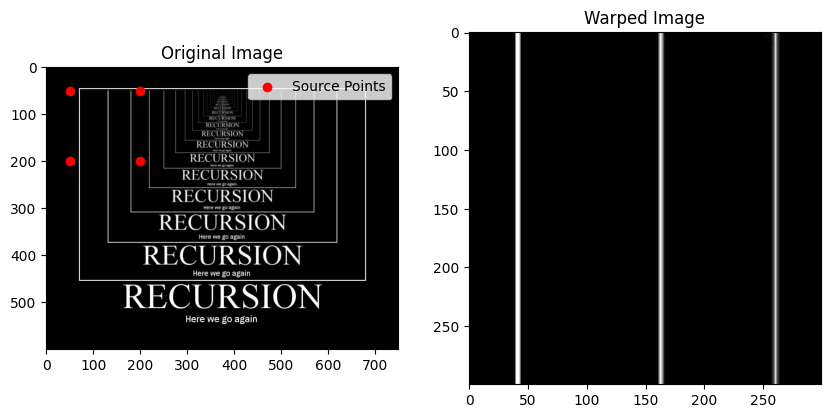

In [14]:
# Четене на изображението
def read_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

# Зареждане на изображението
image = read_image("recursion.jpg")

# Определяне на четирите точки в оригиналното изображение (ръчно или с инструмент)
# Пример: Координати на върховете на областта, която искаш да трансформираш
pts_src = np.array([[50, 50], [200, 50], [50, 200], [200, 200]], dtype=np.float32)

# Задаване на четири точки в правоъгълник в резултатното изображение
# Резултатното изображение ще бъде правоъгълник 300x300
pts_dst = np.array([[0, 0], [300, 0], [0, 300], [300, 300]], dtype=np.float32)

# Изчисление на хомографичната матрица
matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)

# Приложение на перспективната трансформация
warped_image = cv2.warpPerspective(image, matrix, (300, 300))

# Визуализация на резултата
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.scatter(pts_src[:, 0], pts_src[:, 1], c="red", label="Source Points")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Warped Image")
plt.imshow(warped_image)
plt.show()

### * Problem 6. Eigenvalues and Eigenvectors
Some transformations are special. Let's examine this visually.

Modify the code in the transformation visualization example. Instead of the two basis vectors, it should now accept **a vector as a parameter** and it should show that vector in the old and new coordinates. This should be simple enough to do :).

In [15]:
def visualize_transformed_vector(matrix, vec, title):
    """
    Shows the vector (starting at (0; 0)) before and after the transformation
    given by the specified matrix
    """
    # Създаване на фигура за визуализацията
    plt.figure(figsize=(6, 6))
    
    # Първо, показваме оригиналния вектор
    origin = np.array([0, 0])
    plt.quiver(*origin, *vec, angles='xy', scale_units='xy', scale=1, color="r", label="Original Vector")

    # Приложение на трансформацията
    transformed_vec = matrix @ np.array([vec[0], vec[1], 1])  # Добавяме трети елемент, за да бъде хомогенен вектор
    transformed_vec = transformed_vec[:2]  # Извеждаме само първите две координати (2D)

    # След това показваме трансформирания вектор
    plt.quiver(*origin, *transformed_vec, angles='xy', scale_units='xy', scale=1, color="b", label="Transformed Vector")

    # Настройки на графиката
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')  # Правим осите със същото съотношение
    plt.title(title)
    plt.legend()
    plt.show()

Now have a look at the matrix given below:
$$ T = \begin{bmatrix}
2 & -4 \\
-1 & -1
\end{bmatrix} $$

See how the transformation acts on a arbitrary vector:

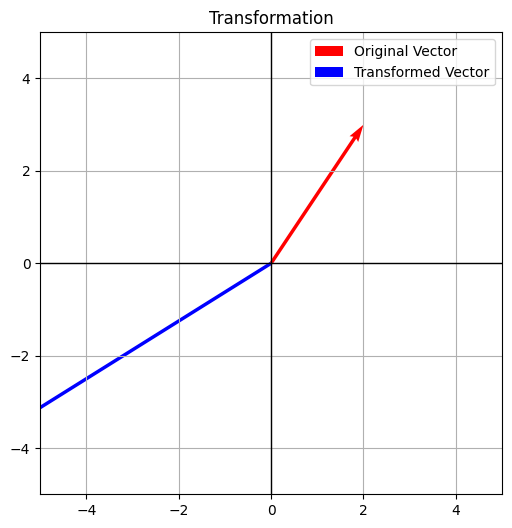

In [16]:
matrix = np.array([[2, -4, 0], [-1, -1, 0], [0, 0, 1]])
visualize_transformed_vector(matrix, [2, 3], "Transformation")

Well, it... transforms it somehow. Let's try another vector:

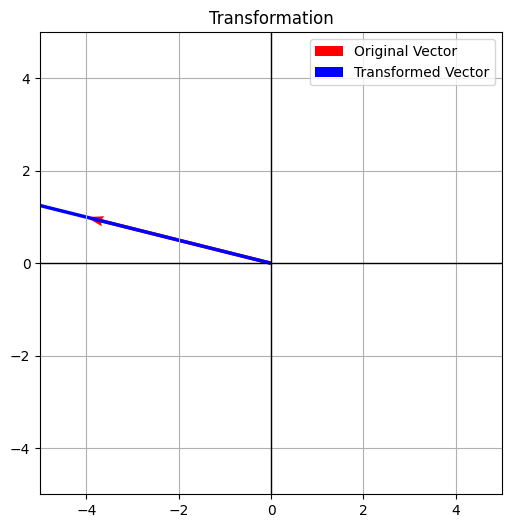

In [17]:
visualize_transformed_vector(matrix, [-4, 1], "Transformation")

Hm... the vector should be **scaled only**. That is, the entire matrix multiplication acts like a scalar multiplication for this special vector. Because it's so special, it's given a name - it's an **eigenvector** of that matrix. The factor which scales it is called an **eigenvalue** corresponding to that eigenvector.

More formally, a vector $v$ is an eigenvector of the matrix $A$, corresponding to the eigenvalue $\lambda$ if
$$ Av = \lambda v $$

You can find more details about the computation [here](https://www.calvin.edu/~scofield/courses/m256/materials/eigenstuff.pdf).

Why are these useful? For example, all of quantum physics is based on eigenvalues and eigenvectors. Also, it's very useful in **dimensionality reduction** problems. If you wish, you can explore that (for example, the principal component analysis algorithm).

### ** Problem 7. Principal Component Analysis
Sometimes a projection of a higher-dimensional to a lower-dimensional space is useful. It's extremely useful if we want to get some visual understanding of a, say, 15D space, in 3D or even 2D. One algorithm which allows us to project multidimensional data into fewer dimensions **while keeping the most important shapes and structures** is called **principal component analysis** (PCA). You can explore this using the following checklist:
* What are eigenvalues and eigenvectors?
* What is the eigenbasis? What is the spectrum of a matrix?
* How do we compute the eigenvalues and eigenvectors of a matrix?
* What is projection?
* How does projection conserve some shapes? Think about an object casting a shadow
* How is the projection problem related to eigenvalues and eigenvectors?
* What is PCA?
* What are principal components? How many components are there (as a function of dimensions of the original space)?
* What is variance? What is explained variance?
* How do principal components relate to explained variance?
* How is PCA implemented? Implement and show
* Show some applications of PCA, e.g. reducing a 3D image to its first 2 principal components, plotting the 3D and 2D images
* Show a practical use of PCA, for example, trying to see features in a 15D space, projected in 3D.

### ** Problem 8. Eigenfaces
Another great use of eigenvalues and eigenvectors can be **feature detection**. In one algorithm, called **eigenfaces**, if you receive many images of faces, you can see "what makes a face". The principal characteristics of a face can be extracted using something similar to PCA.

You can see more info about the topic [at Wikipedia](https://en.wikipedia.org/wiki/Eigenface).

Use the checklist from above, but add information about the "eigenfaces" algorithm.
* How are images represented?
* How are the images transformed?
* What is an eigenface? Why does it look like a typical (albeit blurry) face?
* Implement the algorithm
* Train the algorithm on some face images
* Show what the eigenfaces you got look like
* Use the algorithm for face detection **in an unknown image**

### ** Problem 9. Clustering Analysis. How Different Metrics Affect Clustering Results
One important application of linear algebra is to calculate distances between two points. There are many different ways to calculate a distance. The one which is probably most familiar to you is the **Euclidean distance**. In 2D space, given points $A (x_A; y_A)$ and $B(x_B; y_B)$, the distance is 
$$ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$

There are many more definitions of distance (see for example "taxicab distance").

Many algorithms in data processing and machine learning depend on calculating distances, mainly for calculating errors. A class of algorithms which is based on distances is called **cluster analysis**. Explore what cluster analysis is, and how different distance metrics (e.g. Eucledian and its derivate metrics, taxicab, hexagonal, octagonal, etc.) affect the quality of clustering. Of course, the type of metric you're going to use depends mostly on the data. Explore different scenarios and see why one is better than the other in a particular case.

* What are clusters of points? Why does real-world data tend to clusterize?
* What is clustering analysis? (Optional: What is unsupervised learning?)
* Provide examples of clustering analysis in 2D
* How are clusters defined?
* What is k-means clustering? Why does it converge?
* How does k-means depend on the initialization?
* How can we reduce the dependency on the initialization?
* What is agglomerative clustering (also called hierarchical clustering)?
* Implement (or use a ready-made implementation) k-means and agglomerative clustering
* The algorithms heavily depend on calculating distances between points. Show the results first using the Euclidean metric
* Use another metric (or several other metrics). Compare the results
* Use a custom metric. For example, this might be a function defined manually
* In which cases is a custom metric applicable?
* Apply clustering analysis for a real-world scenario. Some applications include social graphs (relations among people) of all sorts, connected crimes and classification.
* Use different distance metrics on the same dataset. How does it affect the data in general?